In [2]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# sys.path.append(Path().resolve().parent)
# sys.path.append(Path().resolve())
sys.path.append(os.path.join(Path().resolve(), 'DigiLeTs/scripts'))

In [3]:
from data import read_original_data

In [3]:
import cv2
import copy

def get_image_sequence(instance, size=256, line_width=3):
    
    img = np.zeros((size,size,1))
    
    images = []
    actions = []
    for i in range(len(instance) - 1):
        if instance[i][5] == 0 and instance[i+1][5] == 0:
            if instance[i+1][3] == 0:
                img = cv2.line(img=img,
                               pt1=(int(instance[i][0]*size),int((1-instance[i][1])*size)),
                               pt2=(int(instance[i+1][0]*size),int((1-instance[i+1][1])*size)),
                               color=1,
                               thickness=line_width,
                               lineType=cv2.LINE_AA,
                              )
                images.append(copy.deepcopy(img))
                action = (instance[i+1][0]-instance[i][0], instance[i+1][1]-instance[i][1])
                actions.append(action)
                
    images = np.array(images).transpose(0,3,1,2).astype(np.uint8)
    actions = np.array(actions)[1:]
    rewards = np.zeros(len(actions))
    dones = np.zeros(len(actions))
    dones[-1] = 1
    return images, actions, rewards, dones


In [4]:
import glob
data_dir = "data/preprocessed/complete"
filenames = glob.glob(os.path.join(data_dir, '*_preprocessed'))

In [5]:
import os
for idx in range(len(filenames)):
    filename = filenames[idx]
    basename = os.path.basename(filename)
    participant = read_original_data(filename)
    if idx < 70:
        save_folder = "Drawing/train"
    else:
        save_folder = "Drawing/validation"
    for s, symbol in enumerate(participant["trajectories"]):
        if s > 9:
            # 数字以外は省略
            break
        # dataset = dict(image=[], action=[], done=[])
        for i, _instance in enumerate(symbol):
            
            instance = _instance[:participant["lengths"][s, i]]
            images, actions, rewards, dones = get_image_sequence(instance, size=64, line_width=3)
            dataset = dict()
            dataset["image_bin"] = images
            dataset["action"] = actions
            dataset["reward"] = rewards
            dataset["done"] = dones
            # save_foldername = "{}/{}".format(save_folder, s)
            # save_filename = "{}/{}_{}.npy".format(save_foldername, basename, i)
            # # print(save_filename)
            # os.makedirs(save_foldername, exist_ok=True)
            # np.save(save_filename, dataset)
            break

Reading from: data/preprocessed/complete/002-f-22-right_2019-06-05-12-21-29_preprocessed
Reading from: data/preprocessed/complete/004-m-21-right_2019-06-05-12-19-08_preprocessed
Reading from: data/preprocessed/complete/005-f-19-right_2019-06-19-12-21-40_preprocessed
Reading from: data/preprocessed/complete/007-f-24-right_2019-06-19-12-18-49_preprocessed
Reading from: data/preprocessed/complete/008-f-21-right_2019-06-19-12-24-59_preprocessed
Reading from: data/preprocessed/complete/010-f-24-right_2019-06-25-13-03-18_preprocessed
Reading from: data/preprocessed/complete/012-m-28-right_2019-06-25-13-03-16_preprocessed
Reading from: data/preprocessed/complete/013-f-26-right_2019-06-27-11-23-48_preprocessed
Reading from: data/preprocessed/complete/018-f-21-right_2019-07-03-12-22-23_preprocessed
Reading from: data/preprocessed/complete/019-f-20-right_2019-07-03-12-20-29_preprocessed
Reading from: data/preprocessed/complete/020-f-21-right_2019-07-03-12-22-47_preprocessed
Reading from: data/pr

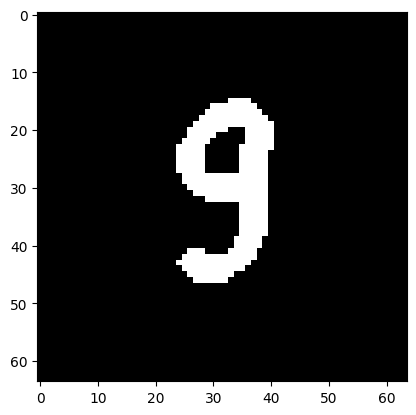

In [9]:
plt.imshow(images[-1,0], cmap="gray")